In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [ ]:
# 'https://www.bls.gov/iif/oshwc/cfoi/cfoi_rates/2020hb.xlsx'

excel = pd.ExcelFile('us_bureau_of_labor_stats.xlsx')
excel

In [ ]:
fatality_rates = excel.parse(sheet_name='Sheet2',header=None)
#fatality_rates.columns=['profession','deaths_per_100K']
fatality_rates

In [ ]:
fatality_rates_summary = fatality_rates.loc[~fatality_rates[1].str.contains('-')]
fatality_rates_summary.columns = ['profession','code','hours[M]','rate_per_100K','margin_of_error']
fatality_rates_summary['profession'] = fatality_rates_summary['profession'].str.strip('occupations')
fatality_rates_summary = fatality_rates_summary.set_index('profession')
fatality_rates_summary = fatality_rates_summary.sort_values('rate_per_100K',ascending=False)
fatality_rates_summary

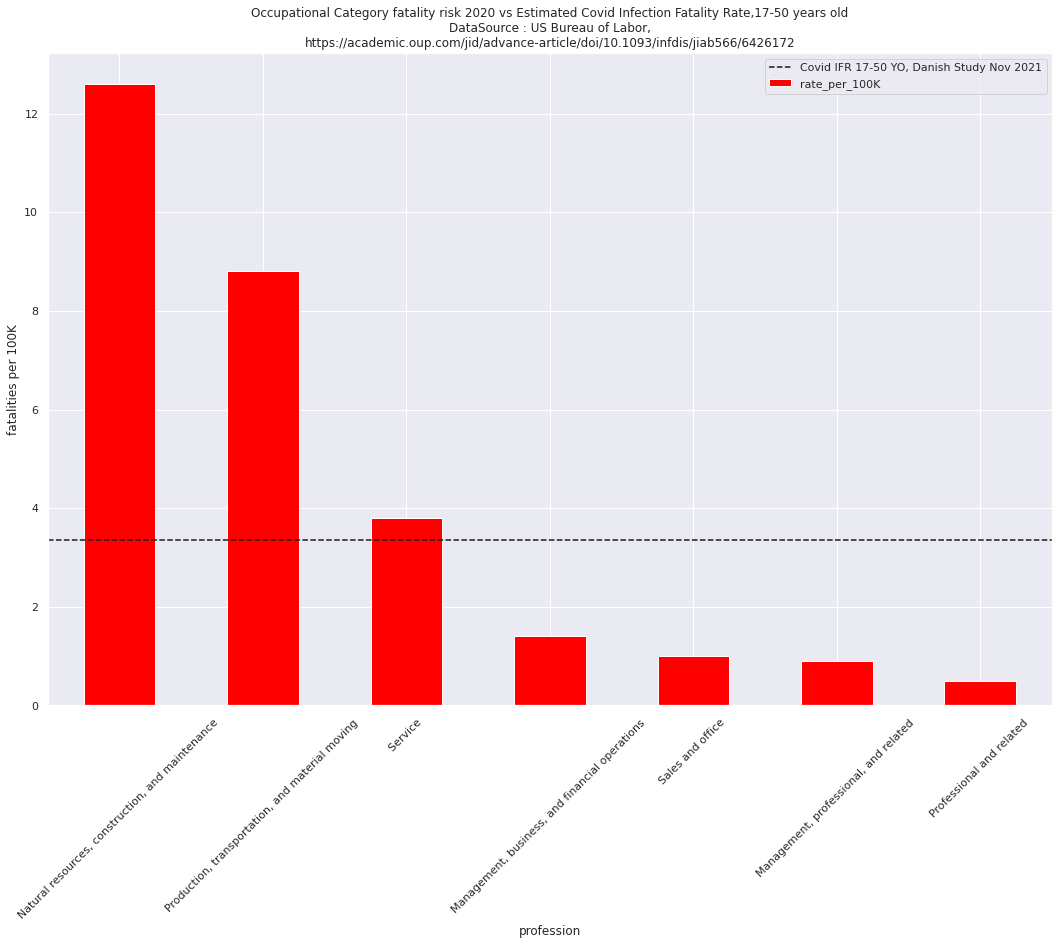

In [112]:
title = 'Occupational Category fatality risk 2020 vs Estimated Covid Infection Fatality Rate,17-50 years old' + \
'\nDataSource : US Bureau of Labor,\nhttps://academic.oup.com/jid/advance-article/doi/10.1093/infdis/jiab566/6426172'
ax = fatality_rates_summary.plot(kind='bar',figsize=(18,12),y='rate_per_100K',color='red',
                                 rot=45,title=title)
ax.set_ylabel('fatalities per 100K')
ax.axhline(3.36,ls='dashed',color='k',label='Covid IFR 17-50 YO, Danish Study Nov 2021')

plt.legend(loc='upper right')
plt.savefig('US_BL_summary_risk.jpg',format='jpg')

In [ ]:
fatality_rates = fatality_rates.loc[fatality_rates[1].str.contains('-')]
fatality_rates.columns = ['profession','code','hours[M]','rate_per_100K','margin_of_error']
fatality_rates['profession'] = fatality_rates['profession'].str.strip('occupations')

fatality_rates

In [ ]:
fatality_rates = fatality_rates.sort_values('rate_per_100K',ascending=False)
fatality_rates = fatality_rates.set_index('profession')
fatality_rates

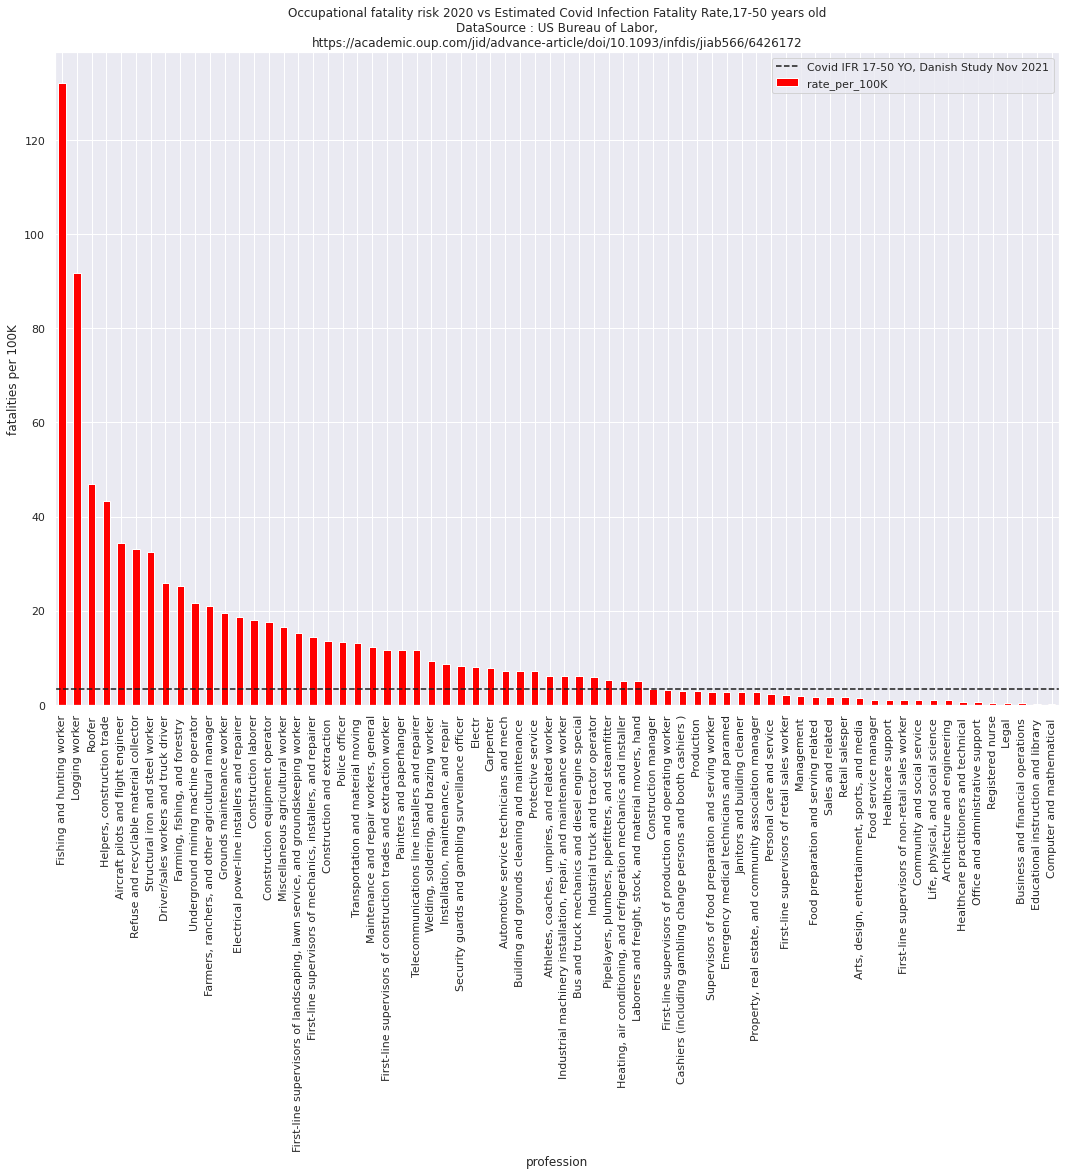

In [114]:
title = 'Occupational fatality risk 2020 vs Estimated Covid Infection Fatality Rate,17-50 years old' + \
'\nDataSource : US Bureau of Labor,\nhttps://academic.oup.com/jid/advance-article/doi/10.1093/infdis/jiab566/6426172'
ax = fatality_rates.plot(kind='bar',figsize=(18,12),y='rate_per_100K',color='red',title=title)
ax.set_ylabel('fatalities per 100K')
ax.axhline(3.36,ls='dashed',color='k',label='Covid IFR 17-50 YO, Danish Study Nov 2021')
plt.legend(loc='upper right')
plt.savefig('US_BL_occupational_risk.jpg',format='jpg')

In [ ]:
title = 'Top-10 Occupational fatality risk 2020 vs Estimated Covid Infection Fatality Rate,17-50 years old' + \
'\nDataSource : US Bureau of Labor,\nhttps://academic.oup.com/jid/advance-article/doi/10.1093/infdis/jiab566/6426172'
ax = fatality_rates.iloc[:10].plot(kind='bar',figsize=(18,12),y='rate_per_100K',color='red',title=title)
ax.set_ylabel('fatalities per 100K')
ax.axhline(3.36,ls='dashed',color='k',label='Covid IFR 17-50 YO, Danish Study Nov 2021')
plt.legend(loc='upper right')
plt.savefig('US_BL_top_10_occupational_risk.jpg',format='jpg')